# Named Entity Recognition

In [4]:
# ---------------------------------------------------------------------------- #
#                               Imports and setup                              #
# ---------------------------------------------------------------------------- #


# pandas
import pandas as pd

# seaborn
import seaborn as sns
sns.set_palette('Reds')

# numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger

plt.rcParams["figure.figsize"] = (16, 10)
matplotlib_axes_logger.setLevel('ERROR')

# parse dataset
%run "src/generate_detailed_stats.py"

words_count_data, entities_count_data, entity_types_count_data, max_length = collect_stats(
    "entity-tag"
)

In [51]:
words_count = pd.DataFrame.from_dict(words_count_data, orient="index").sort_values(0, ascending=False).reset_index()
words_count.columns = ["Word", "Count"]

entities_count = pd.DataFrame.from_dict(entities_count_data, orient="index").sort_values(0, ascending=False).reset_index()
entities_count.columns = ["Id", "Count"]
entity_type_codes = [id.split(":")[1] for id in entities_count["Id"]]
entities = [id.split(":")[0] for id in entities_count["Id"]]
entities_count["Type"] = entity_type_codes
entities_count["Entity"] = entities
entities_count.drop(columns=["Id"], inplace=True)
entities_count.sort_values(['Type', 'Count'], inplace=True)
entities_count = entities_count[["Type", "Entity", "Count"]]

entity_types_count = pd.DataFrame.from_dict(entity_types_count_data, orient="index").sort_values(0, ascending=False).reset_index()
entity_types_count.columns = ["Entity Type", "Count"]

## Words

### Word occurences

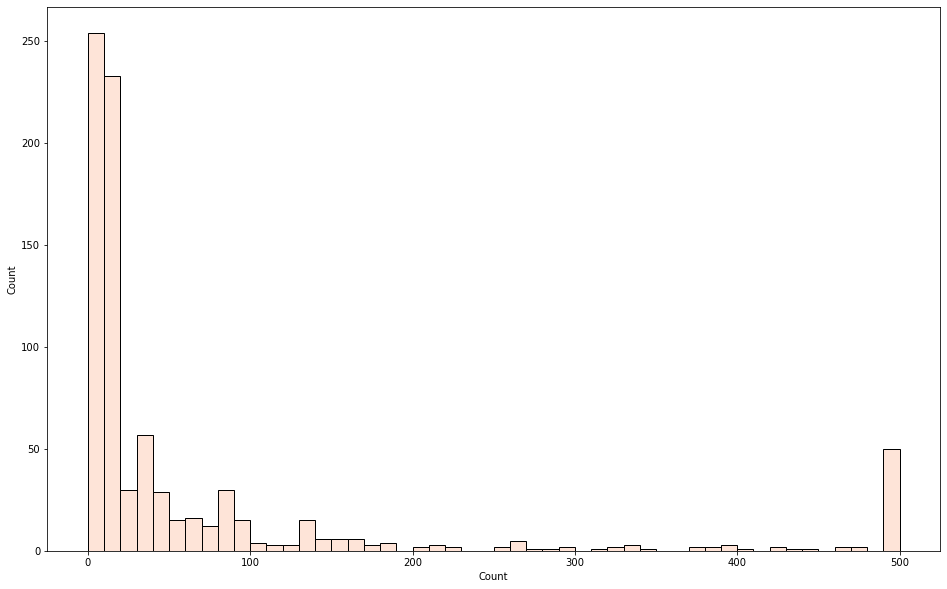

In [6]:
def plot_histplot():
    bins = np.arange(0, 510, 10)
    sns.histplot(data=np.clip(words_count["Count"], bins[0], bins[-1]), bins=bins)
    
plot_histplot()

In [7]:
words_count.select_dtypes("number").describe()

,Count
count,832.000000
mean,138.395433
std,522.485533
min,1.000000
25%,6.000000
50%,13.000000
75%,62.250000
max,8258.000000


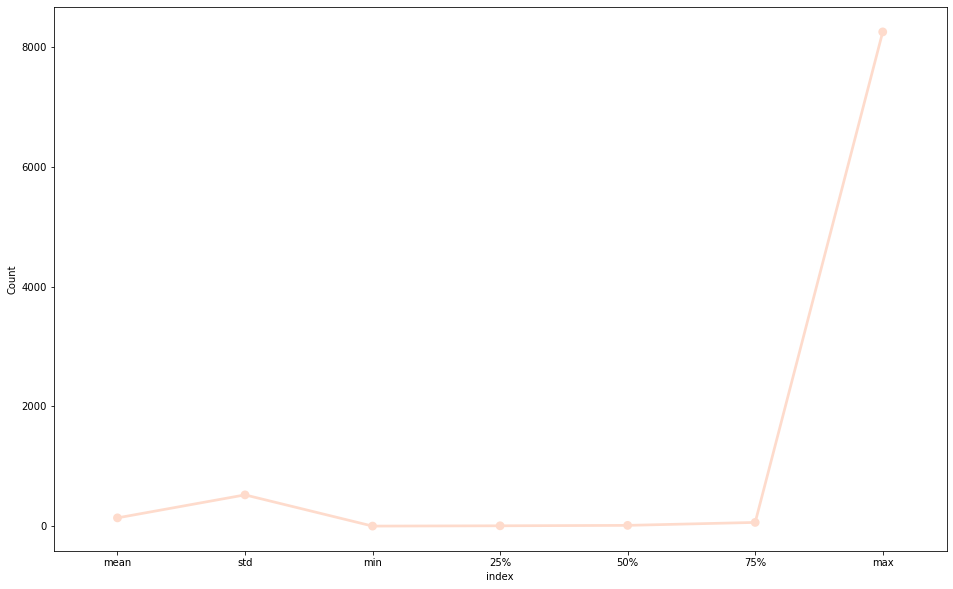

In [8]:
def plot_stats():
    stats = words_count.select_dtypes("number").describe()
    stats.reset_index(inplace=True)
    stats = stats[stats["index"] != "count"]
    
    for col in stats.columns[1:]:
        sns.pointplot(data=stats, x="index", y=col)
    
plot_stats()

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(words_count)

,Word,Count
0,តើ,8258
1,មាន,6000
2,នៅ,4920
3,ទេ,4441
4,ឬ,3157
5,ណា,2560
6,ប្រទេស,2538
7,បាន,2393
8,អត់,2097
9,អ្នក,1978


## Entities

In [10]:
entity_types_count

,Entity Type,Count
0,GPE,2179
1,PER,2098
2,ORG,1267
3,FLOOR,1012
4,ROOM,791
5,BUILD,198
6,ANN,112
7,TIME,40
8,DATE,12


<AxesSubplot:xlabel='Entity Type', ylabel='Count'>

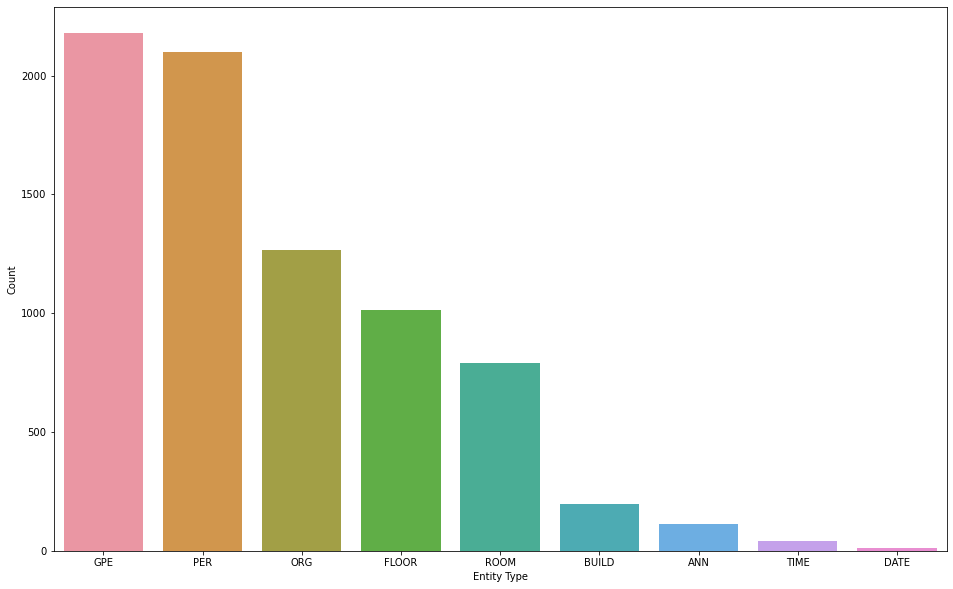

In [11]:
sns.barplot(data=entity_types_count, x="Entity Type", y="Count")

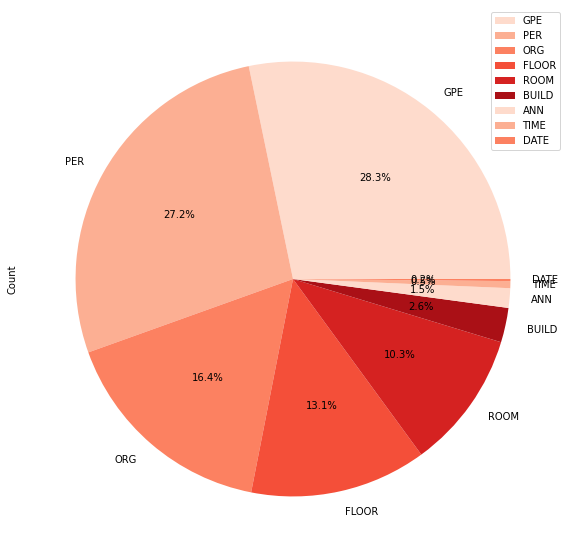

In [12]:
def plot_pieplot():
    entity_types_count.set_index("Entity Type").plot.pie(y="Count", autopct='%.1f%%')
    
plot_pieplot()

In [53]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(entities_count)

,Type,Entity,Count
32,ANN,អាហារូបករណ៍ទៅបារាំង,56
33,ANN,ការងារស្ម័គ្រចិត្ត,56
28,BUILD,អគារIDT,66
29,BUILD,អគារនេះ,66
30,BUILD,អគារInnovationCenter,66
295,DATE,ថ្ងៃអាទិត្យ,2
296,DATE,ថ្ងៃនេះ,2
297,DATE,ថ្ងៃស្អែក,2
298,DATE,ម្លិលមិញ,2
299,DATE,ថ្ងៃទី១០,2


In [72]:
entities_count.groupby('Type').agg({"Count": ['mean', 'sum', 'median', 'min', 'max', 'count']})

Count                            
            mean   sum median min  max count
Type                                        
ANN    56.000000   112   56.0  56   56     2
BUILD  66.000000   198   66.0  66   66     3
DATE    2.000000    12    2.0   2    2     6
FLOOR  72.285714  1012   98.0   6  155    14
GPE    12.241573  2179   12.0   1   37   178
ORG    31.675000  1267   37.5   6  134    40
PER    59.942857  2098   55.0   8  169    35
ROOM   32.958333   791   33.0   1   54    24
TIME   10.000000    40   10.0  10   10     4

<AxesSubplot:xlabel='Type', ylabel='Count'>

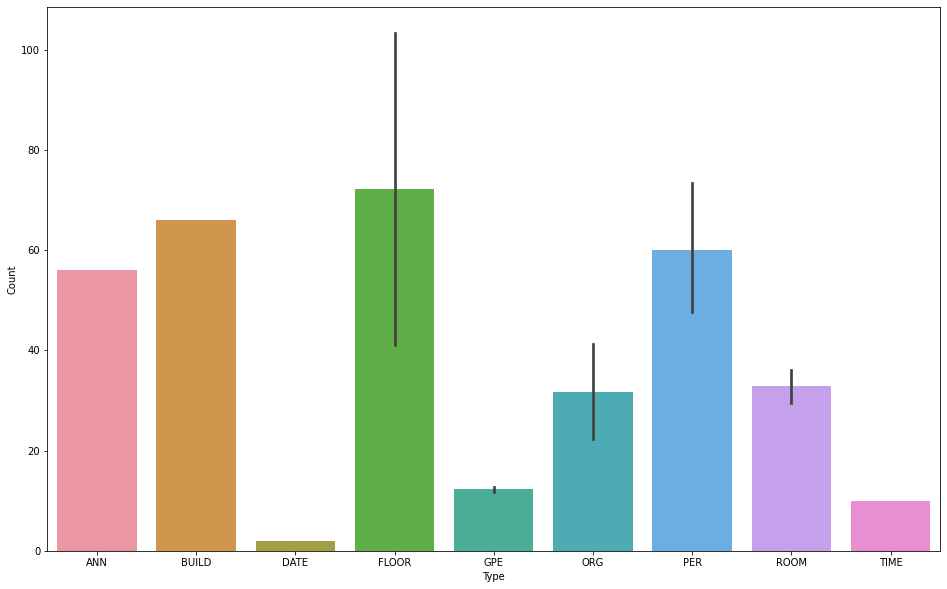

In [82]:
sns.barplot(data=entities_count, x="Type", y="Count")